In [1]:
import pandas as pd

delta x	delta y
43.600	85.700

In [2]:
Front1 = pd.read_csv('data/Face 1 filled.txt', sep='\t')
Back1 = pd.read_csv('data/Face 2 filled.txt', sep='\t')
Front2 = pd.read_csv('data/Face 3 filled.txt', sep='\t')
Back2 = pd.read_csv('data/Face 4 filled.txt', sep='\t')

# Front1 = pd.read_csv('data/Face 1.txt', sep='\t')
# Back1 = pd.read_csv('data/Face 2.txt', sep='\t')
# Front2 = pd.read_csv('data/Face 3.txt', sep='\t')
# Back2 = pd.read_csv('data/Face 4.txt', sep='\t')

In [82]:
Back1



,Module,X,Y,Z
0,1,158.350,-1114.100,3005.5
1,2,201.950,-1114.100,3005.5
2,3,245.550,-1114.100,3005.5
3,4,114.750,-1028.400,3005.5
4,5,158.350,-1028.400,3005.5
...,...,...,...,...
893,894,-332.750,-1028.400,3005.5
894,895,-201.95000000000002,428.5,3005.5
895,896,-158.35000000000002,428.5,3005.5
896,897,201.95000000000002,-428.5,3005.5


In [75]:
# for y,df in Back1.groupby('Y'):
#     df = df.sort_values(by=['X'])
#     print(df)

coors = []
for i in range(len(Front1['X'])):
    try:

        coors.append((float(Front1['X'][i]),float(Front1['Y'][i])))
    except:
        pass

coors.sort(key=lambda x:x[1], reverse=True)

coors
y_s = {}

for i in coors:
    if i[1] in y_s:
        y_s[i[1]].append(i[0])
    else:
        y_s[i[1]] = [i[0]]
    
    y_s[i[1]].sort()

y_s



{1071.25: [-376.35,
  -332.75,
  -289.15,
  -245.55,
  -201.95,
  -158.35,
  -114.75,
  114.75,
  158.35,
  201.95,
  245.55,
  289.15,
  332.75,
  376.35],
 985.55: [-550.75,
  -507.15,
  -463.55,
  -419.95,
  -376.35,
  -332.75,
  -289.15,
  -245.55,
  -201.95,
  -158.35,
  -114.75,
  -71.15,
  -27.55,
  27.55,
  71.15,
  114.75,
  158.35,
  201.95,
  245.55,
  289.15,
  332.75,
  376.35,
  419.95,
  463.55,
  507.15,
  550.75],
 899.85: [-681.55,
  -637.95,
  -594.35,
  -550.75,
  -507.15,
  -463.55,
  -419.95,
  -376.35,
  -332.75,
  -289.15,
  -245.55,
  -201.95,
  -158.35,
  -114.75,
  -71.15,
  -27.55,
  27.55,
  71.15,
  114.75,
  158.35,
  201.95,
  245.55,
  289.15,
  332.75,
  376.35,
  419.95,
  463.55,
  507.15,
  550.75,
  594.35,
  637.95,
  681.55],
 814.15: [-768.75,
  -725.15,
  -681.55,
  -637.95,
  -594.35,
  -550.75,
  -507.15,
  -463.55,
  -419.95,
  -376.35,
  -332.75,
  -289.15,
  -245.55,
  -201.95,
  -158.35,
  -114.75,
  -71.15,
  -27.55,
  27.55,
  71.15,
  

In [80]:
front = [(-201.95, -385.65), (-158.35, -385.65), (201.95, -385.65), (158.35, -385.65), (-245.55, 385.65), (-201.95, 385.65), (-158.35, 385.65), (-114.75, 385.65), (-71.15, 385.65),(-27.550000000000004, 385.65), (16.05, 385.65), (16.049999999999997, 385.65), (59.65, 385.65), (103.25, 385.65), (146.85, 385.65), (190.45, 385.65), (190.45, 385.65), (234.05, 385.65)]
len(front)
back = [(-201.95000000000002, 428.5), (-158.35000000000002, 428.5), (201.95000000000002, -428.5), (158.35000000000002, -428.5)]

x_s_front = [i[0] for i in front]
y_s_front = [i[1] for i in front]
x_s_back = [i[0] for i in back]
y_s_back = [i[1] for i in back]

z1 = [2998.25 for i in range(len(front))]
z2 = [3005.5 for i in range(len(back))]
z3 = [3021.25 for i in range(len(front))]
z4 = [3028.5 for i in range(len(back))]

df1 = Front1[['Module ','X','Y','Z']]
df2 = Back1[['Module ','X','Y','Z']]
df3 = Front2[['Module ','X','Y','Z']]
df4 = Back2[['Module ','X','Y','Z']]

len_module_front = range(df1['Module '][len(df1['Module '])-1]+1,df1['Module '][len(df1['Module '])-1]+len(front)+1)
len_module_back = range(df2['Module '][len(df2['Module '])-1]+1,df2['Module '][len(df2['Module '])-1]+len(back)+1)

data_d1 = [[len_module_front[i],x_s_front[i],y_s_front[i],z1[i]] for i in range(len(front))]
data_d2 = [[len_module_back[i],x_s_back[i],y_s_back[i],z2[i]] for i in range(len(back))]
data_d3 = [[len_module_front[i],x_s_front[i],y_s_front[i],z3[i]] for i in range(len(front))]
data_d4 = [[len_module_back[i],x_s_back[i],y_s_back[i],z4[i]] for i in range(len(back))]

df1_new = pd.DataFrame(data_d1,columns=['Module ','X','Y','Z'])
df2_new = pd.DataFrame(data_d2,columns=['Module ','X','Y','Z'])
df3_new = pd.DataFrame(data_d3,columns=['Module ','X','Y','Z'])
df4_new = pd.DataFrame(data_d4,columns=['Module ','X','Y','Z'])

df1 = df1.append(df1_new,ignore_index=True)
df2 = df2.append(df2_new,ignore_index=True)
df3 = df3.append(df3_new,ignore_index=True)
df4 = df4.append(df4_new,ignore_index=True)

df1.to_csv('data/Face 1 filled.txt',index=False,sep='\t')
df2.to_csv('data/Face 2 filled.txt',index=False,sep='\t')
df3.to_csv('data/Face 3 filled.txt',index=False,sep='\t')
df4.to_csv('data/Face 4 filled.txt',index=False,sep='\t')



In [7]:
Front1.columns

Index(['Module ', 'X', 'Y', 'Z', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'], dtype='object')

In [4]:
Back1[['X','Y']]

,X,Y
0,158.350,-1114.100
1,201.950,-1114.100
2,245.550,-1114.100
3,114.750,-1028.400
4,158.350,-1028.400
...,...,...
889,-158.350,-1028.400
890,-201.950,-1028.400
891,-245.550,-1028.400
892,-289.150,-1028.400


In [3]:
import matplotlib.pyplot as plt
import math
plt.rcParams['figure.figsize'] = [15, 15]

module_y = 28.25
module_x = 43.10

sensor_y = 22 # 0.5 split in between the two sensors
sensor_x = 42.50
sensor_gap = 0.25
mount_y = (module_y-sensor_y-sensor_gap)

disk_inner = 315
disk_outer = 1185 #1185

PB_y = 29.5
PB_x = module_x

patchpanel_length = 300 # was 50

In [4]:
def makeModule(xmin, ymin, orientation='+', z_orientation='+'):
    '''
    This is mainly to check, but also to transform to the right format
    '''
    #print (xmin, ymin, z_orientation)
    multiplier = -1 if orientation == '+' else +1
    z_multiplier = +1 if z_orientation == '+' else -1
    
    outline = [
        [xmin, ymin],
        [xmin, ymin+z_multiplier*multiplier*module_y],
        [xmin-multiplier*module_x, ymin+z_multiplier*multiplier*module_y],
        [xmin-multiplier*module_x, ymin]
    ]
    
    activeArea = [
        [xmin-multiplier*(module_x-sensor_x)/2., ymin+z_multiplier*multiplier*mount_y],
        [xmin-multiplier*(module_x-sensor_x)/2., ymin+z_multiplier*multiplier*(mount_y+sensor_y)],
        [xmin-multiplier*(module_x-sensor_x)/2.-multiplier*sensor_x, ymin+z_multiplier*multiplier*(mount_y+sensor_y)],
        [xmin-multiplier*(module_x-sensor_x)/2.-multiplier*sensor_x, ymin+z_multiplier*multiplier*mount_y]
    ]
    
    center = (xmin-multiplier*module_x/2., ymin+z_multiplier*multiplier*(mount_y+sensor_y/2.))
    
    return [plt.Polygon(outline, closed=True, fill=None, edgecolor='b'), plt.Polygon(activeArea, closed=True, fc=(1,0,0,0.5), ec=(0,0,0,1)), plt.Circle(center, 1, fc=(1,1,0,0.5), ec=(0,0,0,1))], center

In [5]:
module_y = 56.5
module_x = 43.10

sensor_y = 22 # 0.5 split in between the two sensors
sensor_x = 42.50
sensor_gap = 0.25
mount_y = (module_y-sensor_y-sensor_gap)

def makeModule_full(x, y):
    '''
    This is mainly to check, but also to transform to the right format
    '''
    
    outline = [
        [x-module_x/2, y-module_y/2],
        [x-module_x/2, y+module_y/2],
        [x+module_x/2, y+module_y/2],
        [x+module_x/2, y-module_y/2],
    ]
    
    activeArea1 = [
        [x-sensor_x/2, y+sensor_gap],
        [x-sensor_x/2, y+sensor_gap+sensor_y],
        [x+sensor_x/2, y+sensor_gap+sensor_y],
        [x+sensor_x/2, y+sensor_gap],
    ]
    
    activeArea2 = [
        [x-sensor_x/2, y-sensor_gap],
        [x-sensor_x/2, y-sensor_gap-sensor_y],
        [x+sensor_x/2, y-sensor_gap-sensor_y],
        [x+sensor_x/2, y-sensor_gap],
    ]
    
    centers = [(x, y+sensor_gap+sensor_y/2), (x, y-sensor_gap-sensor_y/2)]
    
    return [
        plt.Polygon(
            outline,
            closed=True,
            fill=None,
            edgecolor='b',
        ),
        plt.Polygon(
            activeArea1,
            closed=True,
            fc=(1,0,0,0.5),
            ec=(0,0,0,1),
        ),
        plt.Polygon(
            activeArea2,
            closed=True,
            fc=(1,0,0,0.5),
            ec=(0,0,0,1),
        ),
        plt.Circle(
            centers[0],
            1,
            fc=(1,1,0,0.5),
            ec=(0,0,0,1),
        ),
        plt.Circle(
            centers[1],
            1,
            fc=(1,1,0,0.5),
            ec=(0,0,0,1),
        ),
    ], centers

In [6]:
for x,y in Back1[Back1['Module ']==754][['X', 'Y']].values:
    print (type(x), x)

<class 'str'> #REF!


In [7]:
for x, y, z_orientation in Back1[['X','Y', 'Z']].values:
    print (float(z_orientation))

3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5

Couldn't read coordinates of module number 754


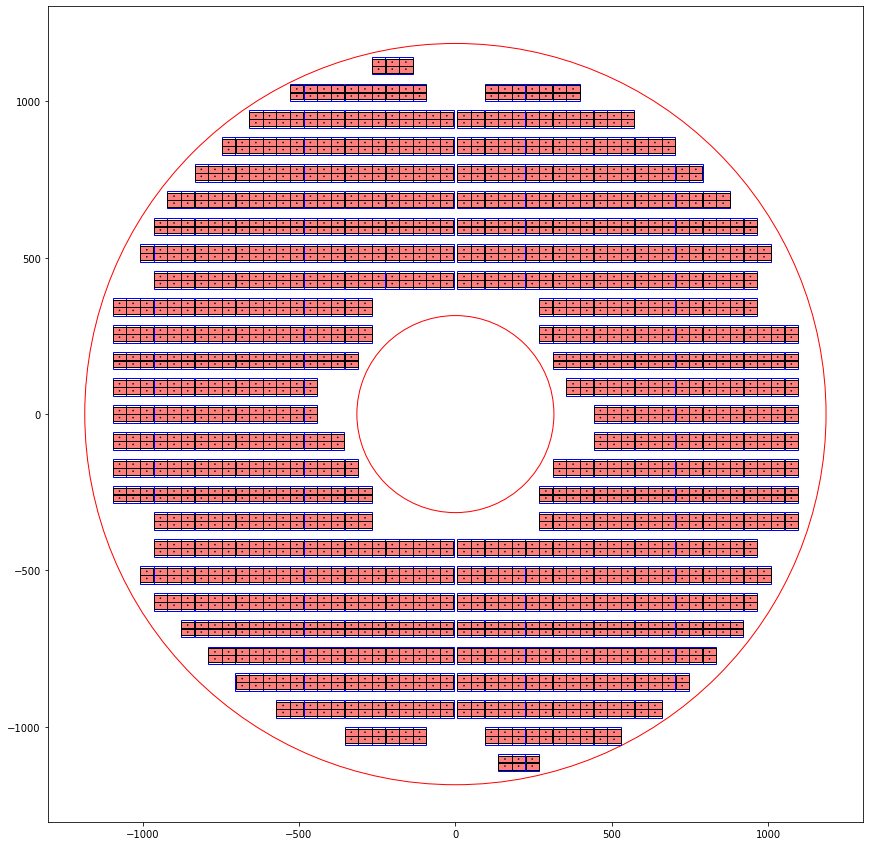

In [10]:

def fillDee(positions):
    modules = []
    centers = []
    for mod_nr, x, y, z_orientation in positions[['Module ', 'X','Y', 'Z']].values:
        #print (x[0], y[0], z_orientation[0])
        #print (mod_nr)
        #if x.count('REF'): continue
        try:
            r = makeModule_full(
                float(x),
                float(y),
                #orientation=orientation,
                #z_orientation=float(z_orientation),
            )
            modules += r[0]
            centers += r[1]
        except ValueError:
            print ("Couldn't read coordinates of module number %s"%mod_nr)
    
    return modules, centers

modulesB, centersB = fillDee(Back1)
modulesF, centersF = fillDee(Front1)

inner = plt.Circle((0, 0), 315,fill=None, edgecolor='r')
outer = plt.Circle((0, 0), 1185,fill=None, edgecolor='r')

plt.gca().add_patch(inner)
plt.gca().add_patch(outer)

#modules += makeModule(0, 0, '+')

hori = plt.Line2D((-1185, 1185), (0, 0), lw=2.5)
vert = plt.Line2D((0, 0), (-1185, 1185), lw=2.5)

#plt.gca().add_line(hori)
#plt.gca().add_line(vert)

for m in modulesB:# + modulesB:
    plt.gca().add_patch(m)
#for m in modulesB:
#    plt.gca().add_patch(m)

plt.axis('scaled')
plt.show()

In [78]:
s = -289.15
while s < 289.15:
    s += 43.6
    print(s)

-245.54999999999998
-201.95
-158.35
-114.75
-71.15
-27.550000000000004
16.049999999999997
59.65
103.25
146.85
190.45
234.04999999999998
277.65
321.25


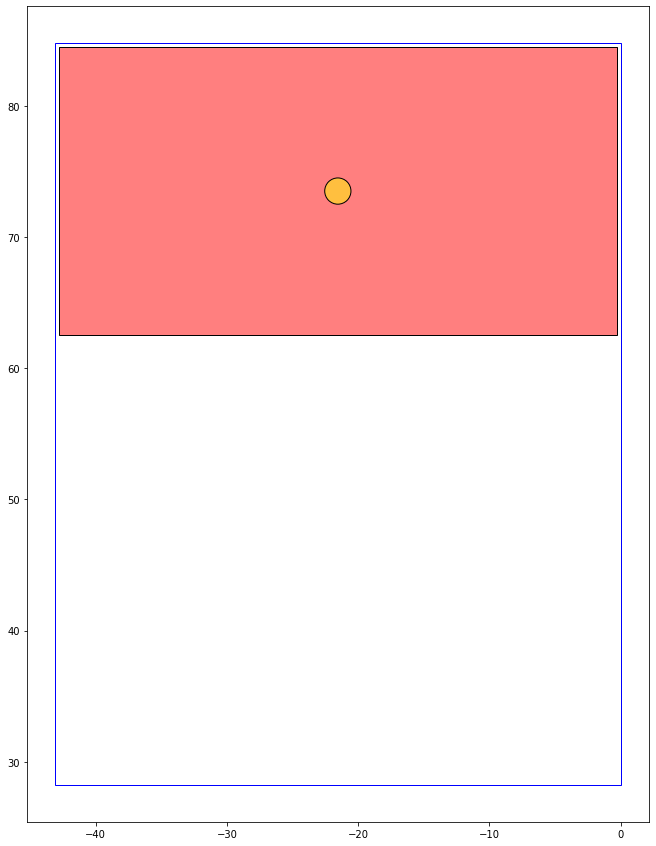

In [40]:
m = makeModule(0, 28.25, '-', '+')[0]
plt.gca().add_patch(m[0])
plt.gca().add_patch(m[1])
plt.gca().add_patch(m[2])
plt.axis('scaled')
plt.show()

In [90]:
disk_setting = \
    {'new':
     {'disk1':
      {'front': fillDee(Front1)[1],
       'back': fillDee(Back1)[1]
      },
      'disk2':
      {'front': fillDee(Front2)[1],
      'back': fillDee(Back2)[1]
     }
    }
   }

Couldn't read coordinates of module number 754
Couldn't read coordinates of module number 754


In [91]:
from yaml import load, dump
try:
    from yaml import CLoader as Loader, CDumper as Dumper
except ImportError:
    from yaml import Loader, Dumper


with open('database_new_filled.yaml', 'w') as f:
    dump(disk_setting, f, Dumper=Dumper, default_flow_style=False)

In [12]:
math.cosh(1.7)

2.828315457889967

In [16]:
3000*math.tan(2*math.atan(math.exp(1.7)))

-1133.9445830050859